## Importing Libraries and Analysing.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement-dataset.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

## Data is Preprocessing and cleaning.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## Visualising Data

In [9]:
import matplotlib.pyplot as plt

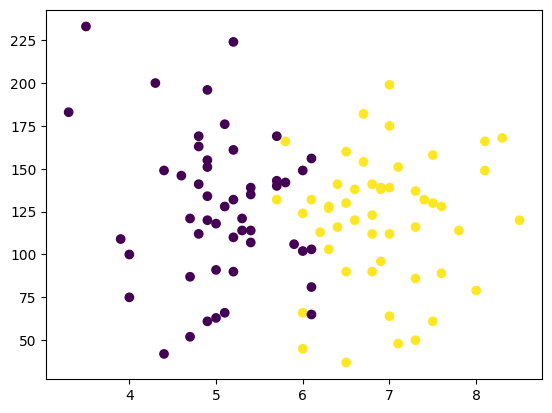

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
80,4.9,196.0
47,5.2,161.0
9,5.1,66.0
61,7.3,137.0
46,5.3,114.0
...,...,...
81,5.4,107.0
79,6.5,90.0
73,4.9,61.0
38,6.5,160.0


In [17]:
y_train

,placement
80,0
47,0
9,0
61,1
46,0
...,...
81,0
79,1
73,0
38,1


In [18]:
X_test

,cgpa,iq
1,5.9,106.0
36,5.7,140.0
16,5.2,224.0
52,7.0,175.0
6,5.7,143.0
63,6.3,128.0
77,7.3,50.0
67,5.0,118.0
18,4.0,100.0
78,6.1,81.0


In [19]:
y_test

,placement
1,0
36,0
16,0
52,1
6,0
63,1
77,1
67,0
18,0
78,0


### Scaling the Values

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_train

array([[-0.95785802,  1.86837635],
       [-0.69897748,  0.96943248],
       [-0.78527099, -1.47055801],
       [ 1.11318635,  0.35301383],
       [-0.61268396, -0.23772071],
       [ 1.3720669 , -0.87982347],
       [ 1.80353448,  0.66122315],
       [ 0.50913174, -0.08361605],
       [ 0.16395768, -0.26340482],
       [-1.04415154,  1.17490536],
       [ 1.97612151,  1.14922125],
       [-1.13044506, -1.83013556],
       [ 0.42283823,  0.17322506],
       [ 2.14870854, -0.08361605],
       [ 1.80353448,  1.09785303],
       [ 0.94059932,  0.71259138],
       [-0.00862935, -0.54593004],
       [-0.18121638,  1.09785303],
       [ 1.28577338,  0.17322506],
       [ 0.07766416,  0.84101193],
       [-0.78527099,  1.35469414],
       [-1.13044506, -0.93119169],
       [ 0.68171877, -0.28908893],
       [ 0.2502512 ,  0.09617272],
       [-1.04415154,  0.45575027],
       [-0.87156451, -1.54761034],
       [-0.95785802,  0.81532782],
       [ 1.71724096, -1.13666458],
       [ 0.85430581,

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[-0.09492287, -0.44319359],
       [-0.2675099 ,  0.43006616],
       [-0.69897748,  2.58753144],
       [ 0.85430581,  1.32901003],
       [-0.2675099 ,  0.50711849],
       [ 0.2502512 ,  0.12185684],
       [ 1.11318635, -1.88150378],
       [-0.87156451, -0.13498427],
       [-1.73449967, -0.59729826],
       [ 0.07766416, -1.08529636]])

### Training the Model Logistic Regression Classifier

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
clf.fit(X_train,y_train)

LogisticRegression()

### Evaluating the Model

In [32]:
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

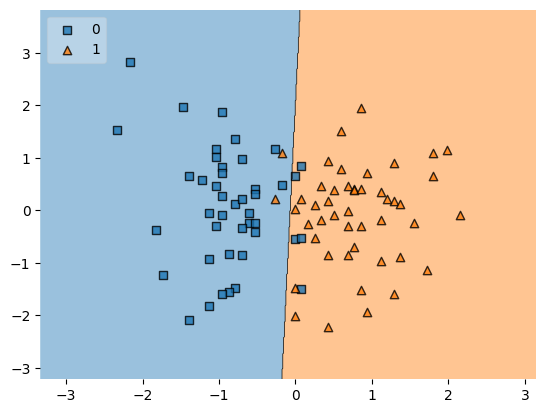

In [37]:
plot_decision_regions(X_train, y_train.values, clf= clf, legend=2)